In [1]:
import sys
sys.path.append('..')
import rigidity
import numpy as np
import scipy.linalg
from sympy import Matrix

In [2]:
import importlib
importlib.reload(rigidity)

<module 'rigidity' from 'c:\\Users\\josep\\OneDrive - University of St Andrews\\Documents\\St Andrews\\Laidlaw\\GitHub\\laidlaw-origami\\rigidity\\examples\\..\\rigidity.py'>

In [3]:
verts = [0,1,2,3,4,5,6]
edges = {
    0: [1, 2, 6],
    1: [0, 3, 6],
    2: [0, 4],
    3: [1, 5],
    4: [2, 5, 6],
    5: [3, 4, 6],
    6: [0, 1, 4, 5]
}
G = [verts, edges]

r0 = np.array([[0, 0, 0]]).transpose()
r1 = np.array([[0, 0, 1]]).transpose()
r2 = np.array([[0, 1, 0]]).transpose()
r3 = np.array([[0, 1, 1]]).transpose()
r4 = np.array([[1, 0, 0]]).transpose()
r5 = np.array([[1, 0, 1]]).transpose()
r6 = np.array([[1, 1, 0]]).transpose()

P = [r0, r1, r2, r3, r4, r5, r6]
n = len(P)

f = rigidity.Framework(G, P)
P = np.column_stack(P)

In [4]:
R = f.rigidityMatrix()
np.linalg.matrix_rank(R)

10

In [5]:
K = scipy.linalg.null_space(R)

In [15]:
K.shape

(21, 11)

In [6]:
def proj_colsp_matrix(X):
    XX = scipy.linalg.orth(X)
    return XX@XX.T

In [7]:
def proj_colsp(X,V):
    P = proj_colsp_matrix(X)
    return scipy.linalg.orth(P@V)

In [8]:
def proj_colsp_away_matrix(X):
    m,n = X.shape
    return np.eye(m) - proj_colsp_matrix(X)

In [9]:
def proj_colsp_away(X,V):
    Pa = proj_colsp_away_matrix(X)
    return scipy.linalg.orth(Pa@V)

In [39]:
A = proj_colsp_away(Triv, N)
A[:,0]

array([-0.07338355, -0.0756832 ,  0.12246457, -0.26323948,  0.04888945,
        0.12246457,  0.06778661, -0.0756832 , -0.65108152,  0.24473844,
        0.04888945,  0.3949585 ,  0.25334059,  0.10987078, -0.08827699,
        0.02969493, -0.16615406, -0.08827699, -0.25893753,  0.10987078,
        0.18774785])

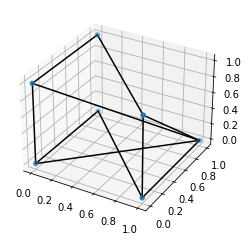

In [7]:
f.draw()

In [11]:
p1 = np.array([
    [  0,  1,  0],
    [ -1,  0,  0],
    [  0,  0,  0]
])

p2 = np.array([
    [  0,  0,  1],
    [  0,  0,  0],
    [ -1,  0,  0]
])

p3 = np.array([
    [  0,  0,  0],
    [  0,  0,  1],
    [  0, -1,  0]
])

Tx = np.array([1, 0, 0] * n)
Ty = np.array([0, 1, 0] * n)
Tz = np.array([0, 0, 1] * n)
R1 = (p1@P).T.flatten()
R2 = (p2@P).T.flatten()
R3 = (p3@P).T.flatten()

In [12]:
N = scipy.linalg.null_space(R)
Triv = np.column_stack([Tx, Ty, Tz, R1, R2, R3])
TrivOrth = scipy.linalg.orth(Triv)
N_flexes = N.shape[1]

In [14]:
NullVects = [N[:,i] for i in range(N_flexes)]
projAway = np.empty_like(N)

for j, v in enumerate(NullVects):
    v = v.copy()
    trivVect = np.zeros(3*n)
    for i in range(6):
        trivVect += v.dot(TrivOrth[:,i])*TrivOrth[:,i]
    projAway[:,j] = (v-trivVect)


In [40]:
O = scipy.linalg.orth(projAway)

In [45]:
[
    A[:,4].dot(Tx),
    A[:,4].dot(R1),
    A[:,4].dot(Tz),
    A[:,4].dot(Ty),
    A[:,4].dot(R2),
    A[:,4].dot(R3)
]

[-3.469446951953614e-17,
 -1.1102230246251565e-16,
 5.551115123125783e-17,
 -9.71445146547012e-17,
 5.551115123125783e-17,
 -1.942890293094024e-16]

In [51]:
VPQO = R@A[:,4]
VPQO[VPQO < 0.001] = 0
VPQO

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [164]:
%matplotlib widget
f.draw()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …